# Background

## Will a Customer Accept the Coupon?

Imagine driving through town and having a coupon delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor in whether the coupon is delivered to the driver, but what factors determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?



# Conclusion

The analysis presented below of the acceptance rates for bar and carry-out & takeaway coupons reveals distinct patterns based on demographic and behavioral factors:

## 1. Bar Coupons:
- Age and Behavior:  Individuals over 25 who visited bars more than once in the last month had a higher acceptance rate.
- Passenger and Occupation:  Those traveling with non-child passengers and not engaged in farming, fishing, or forestry occupations were more likely to   accept the coupon.
- Marital Status:  Non-widowed individuals with non-child passengers had an above-average acceptance rate.

## 2. Carry-Out & Take-Away Coupons:
- Age and Behavior:  Individuals 21 years and younger who frequented carry-out and take-away places more than once in the last month showed higher acceptance rates.
-Passenger and Employment Status:  People who were alone and unemployed were more likely to accept these coupons.
- Marital Status:  Single individuals demonstrated a higher likelihood of accepting the coupon compared to the average.

## 3. Distance to Coupon redemption:
- If the distance to coupon redemption is 25 minutes or greater then it is unlikely that the customer will accept the coupon 

# Key Insights:

- Age and Coupon Type:  Older individuals prefer bar coupons, while younger individuals are more inclined towards carry-out and take-away coupons.
- Social and Employment Status:  Those who are alone and unemployed tend to accept carry-out and take-away coupons, whereas people traveling with adult passengers (and not in certain occupations) prefer bar coupons.
- Marital Status:  Singles are more likely to accept carry-out and take-away coupons, whereas non-widowed individuals without child passengers are more likely to accept bar coupons.

These insights can help in targeting specific demographics with appropriate coupon types to maximize acceptance rates.

# 1.1 Load Libraries #
All Libraries for this analysis are loaded in the next cell

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import textwrap

# 1.2 Load Dataset #

The original coupons dataset is loaded in the next cell and then the next cell provides a visual check that the pandas dataframe is ok, notice the NaN data in the CarryAway column. We will need to look at missing data.

In [454]:
data = pd.read_csv('data/coupons.csv')

In [456]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# 1.3.1 Cleaning - Find Missing Data #

The following cells deal with missing data in the car: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 columns.
I decided to impute the mode value for columns CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 columns and drop the car column as a lot of data was missing in that column.

In [459]:
# Find columns with missing data
missing_data = data.isnull().sum()

# Filter out columns without missing data
columns_with_missing_data = missing_data[missing_data > 0]

# Display columns with missing data
print(columns_with_missing_data)

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


In [461]:

# Define the columns with missing values and the strategy for each
columns_to_impute = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Impute missing values with the mode for categorical columns
for column in columns_to_impute:
    if data[column].isnull().sum() > 0:
        mode_value = data[column].mode()[0]  # Get the most frequent value (mode)
        data[column] = data[column].fillna(mode_value)  # Fill missing values with the mode

# Since 'car' has a large number of missing values, decide to drop the column
if 'car' in data.columns:
    data = data.drop('car', axis=1)

# Find columns with missing data
missing_data = data.isnull().sum()

# Filter out columns without missing data
columns_with_missing_data = missing_data[missing_data > 0]

# Display columns with missing data
print(columns_with_missing_data)

Series([], dtype: int64)


# 1.3.2 Cleaning - Removal of Low Correlation and Outliers #
Looking through the dataset, I noticed that the direction_same, direction_opp, and toCoupon_GEQ25min had Low correlation coupon acceptance and Outliers. The following cell visualizes this finding, and the cell after that drops these columns from the dataset. It is recommended that coupons are not issued if travel time to them is 25 minutes or longer.


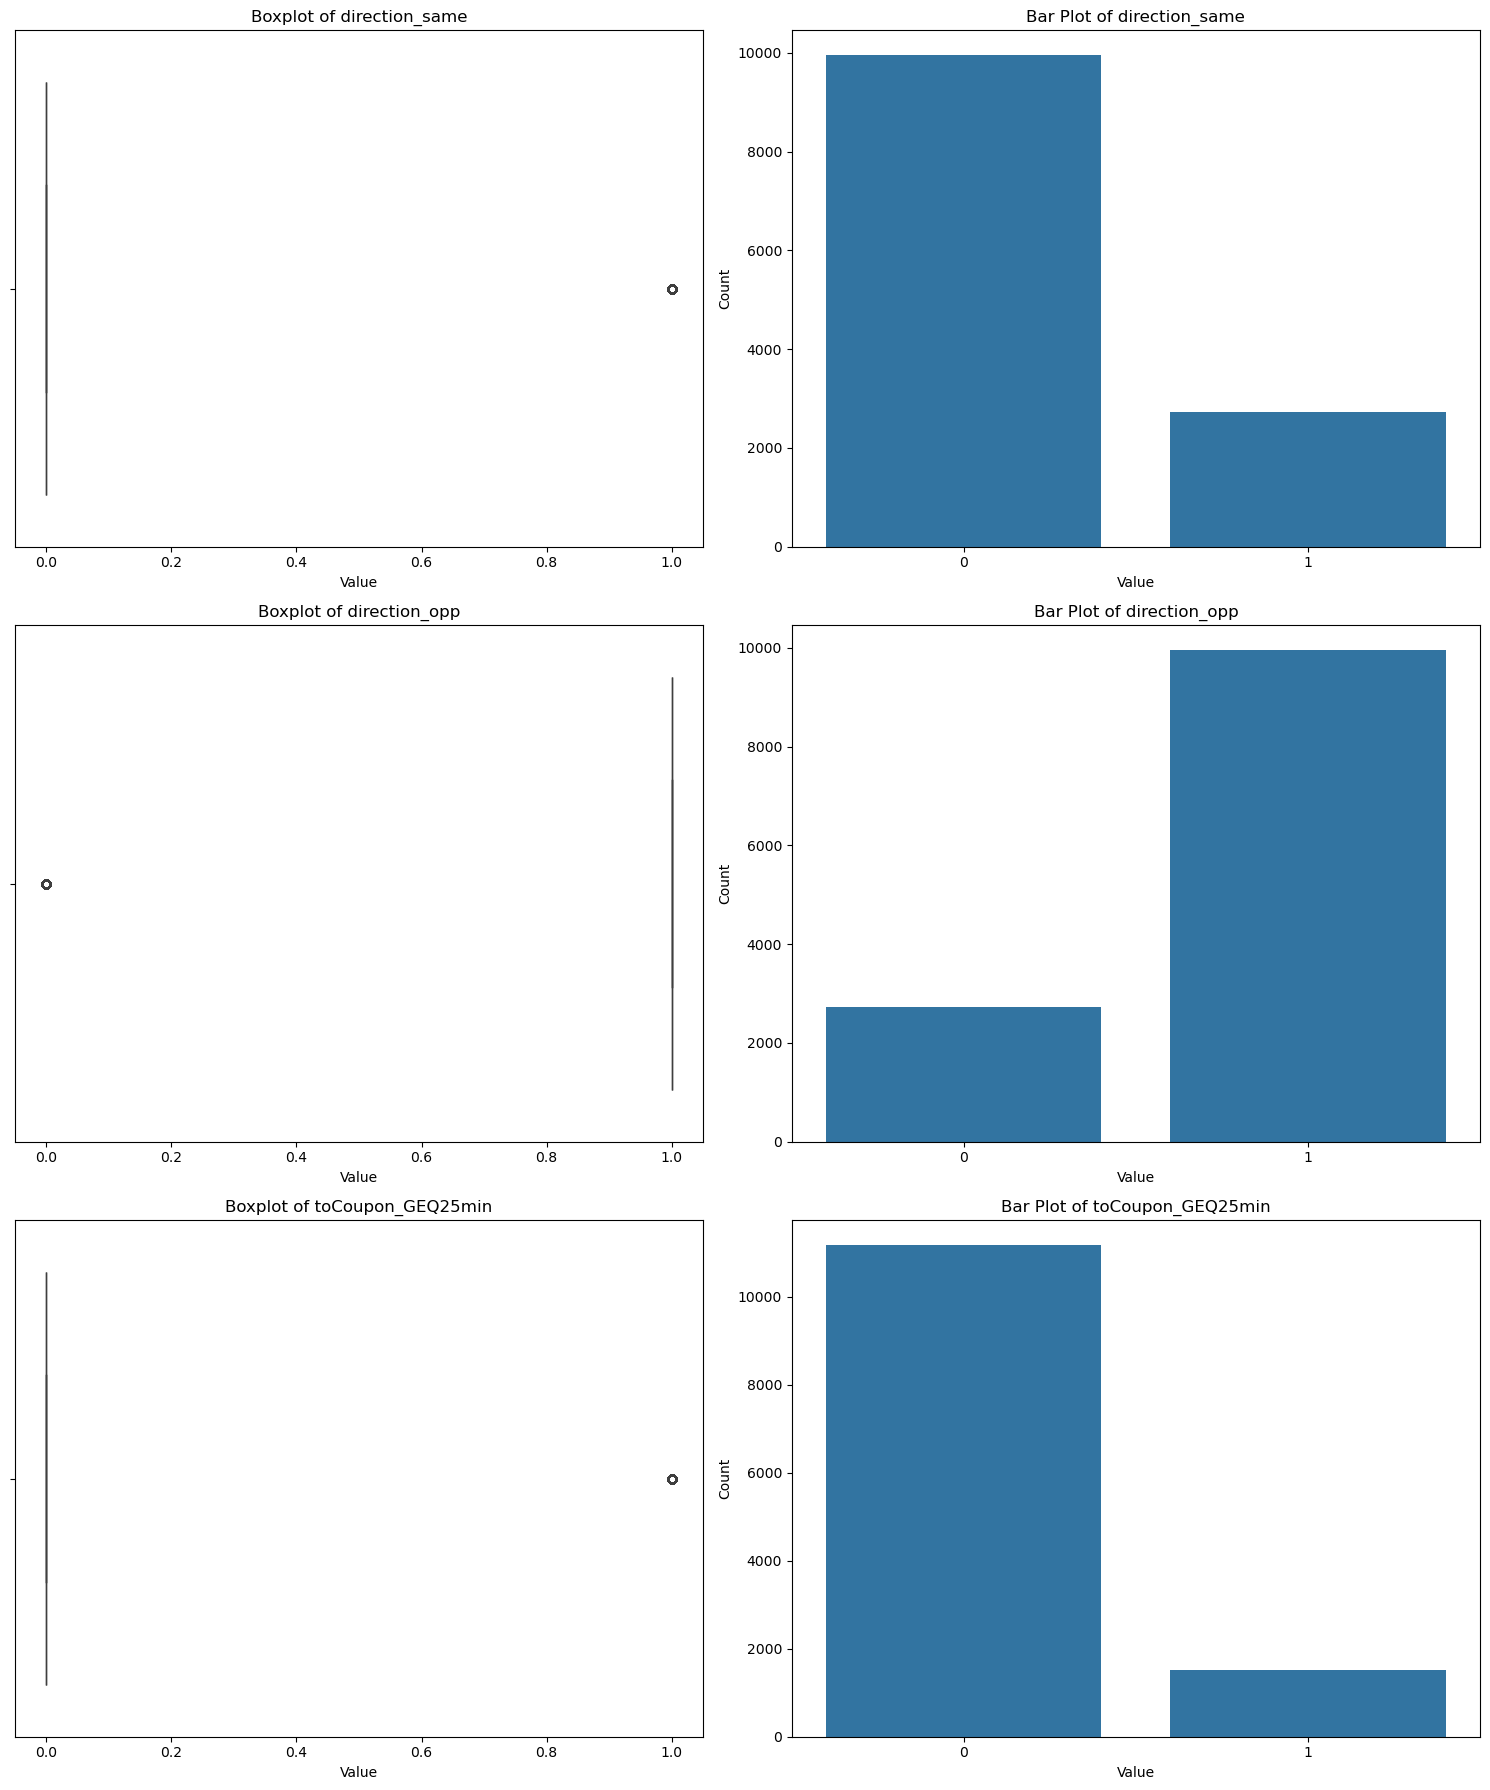

In [464]:

# Columns to visualize
columns_to_visualize = ['direction_same', 'direction_opp', 'toCoupon_GEQ25min']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))

# Generate boxplot and bar plot for each column
for i, column in enumerate(columns_to_visualize):
    # Boxplot
    sns.boxplot(data=data[column], orient='h', ax=axes[i][0])
    axes[i][0].set_title(f'Boxplot of {column}')
    axes[i][0].set_xlabel('Value')
    
    # Bar plot
    sns.countplot(data=data, x=column, ax=axes[i][1])
    axes[i][1].set_title(f'Bar Plot of {column}')
    axes[i][1].set_xlabel('Value')
    axes[i][1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [465]:
data = data.drop('toCoupon_GEQ25min', axis=1)
data = data.drop('direction_same', axis=1)
data = data.drop('direction_opp', axis=1)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0


# 1.3.3 Cleaning - Convert Age Column to Numeric #
Convert the age column to numeric for easier processing later on in the analysis.

In [469]:
# Define a dictionary for replacement
age_replacements = {
    '50plus': 50,
    'below21': 20
}

# Replace the values in the 'age' column
data['age'] = data['age'].replace(age_replacements)

# Convert the 'age' column to numeric
data['age'] = pd.to_numeric(data['age'])

# Verify the changes
print(f"These are the unique values for age now in the dataset: {data['age'].unique()}")


These are the unique values for age now in the dataset: [21 46 26 31 41 50 36 20]


# 1.3.4 Cleaning - Rename Column "passanger" to "passenger" #
Renaming the column for the correct spelling of "passenger".

In [472]:
# Rename the 'passanger' column to 'passenger'
data.rename(columns={'passanger': 'passenger'}, inplace=True)

# Output cleaned dataframe to CSV
#data.to_csv('data/cleaned_coupon.csv', index=False)

# Verify the change
print(data['passenger'])

0            Alone
1        Friend(s)
2        Friend(s)
3        Friend(s)
4        Friend(s)
           ...    
12679      Partner
12680        Alone
12681        Alone
12682        Alone
12683        Alone
Name: passenger, Length: 12684, dtype: object


# 1.4 What proportion of the total observations chose to accept the coupon? #
The following cell will provide the proportion of coupons accepted by taking the total number of coupons issued and dividing by 
the coupons accepted.


In [475]:
# Calculate the count and proportion of each category in the 'Y' column
acceptance_counts = data['Y'].value_counts(normalize=True).reset_index()
acceptance_counts.columns = ['Coupon Accepted', 'Proportion']

# Print just the accepted value
accepted_proportion = acceptance_counts[acceptance_counts['Coupon Accepted'] == 1]['Proportion'].values[0]
print(f"Proportion of people who accepted the coupon: {accepted_proportion}")

Proportion of people who accepted the coupon: 0.5684326710816777


# 1.5 Use a bar plot to visualize the `coupon` column. #
The following visualization provides insight into the types of coupons and the gender they were given to. This seems fairly even, therefore gender does not seem to be a factor in coupon acceptance.

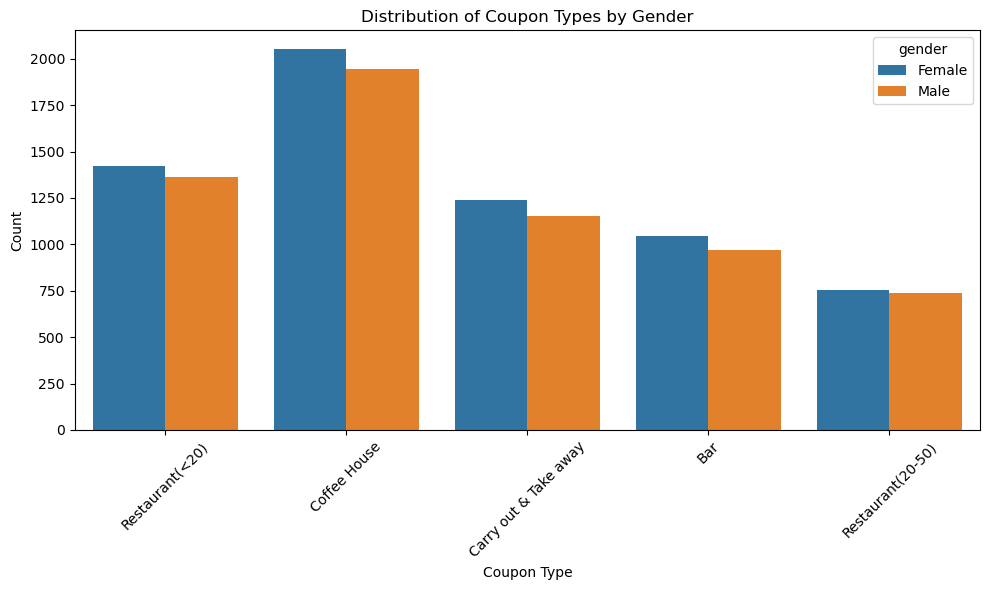

In [478]:
# Create a bar plot for the 'coupon' column with 'gender' as hue
plt.figure(figsize=(10, 6))
sns.countplot(data, x='coupon', hue='gender')
plt.title('Distribution of Coupon Types by Gender')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# 1.6 Use a histogram to visualize the temperature column. #
The following visualization shows the temperature and weather.

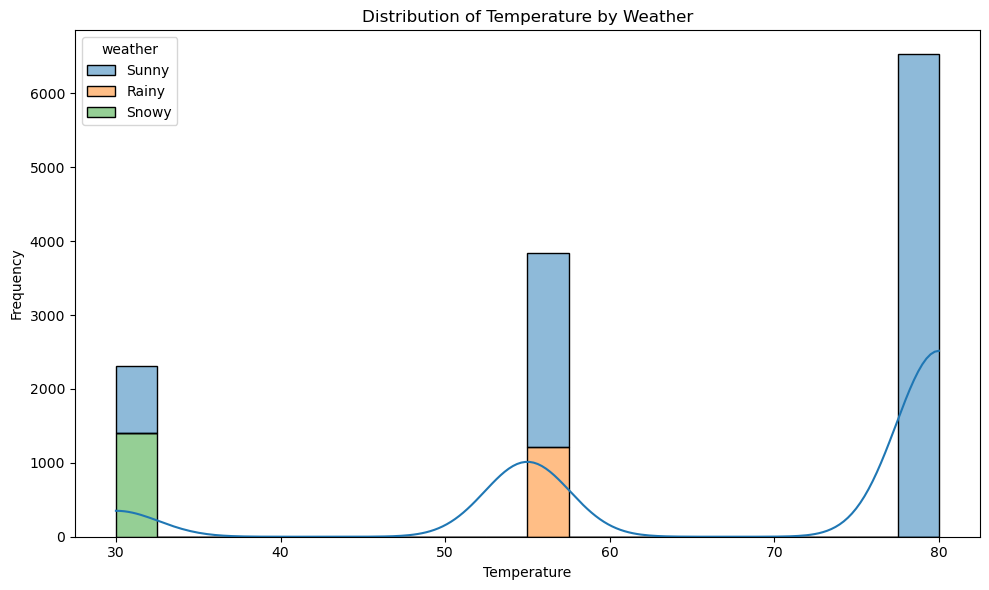

In [481]:
# Create a histogram for the 'temperature' column with 'weather' as hue using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data, x='temperature', bins=20, hue='weather', multiple='stack', kde=True)
plt.title('Distribution of Temperature by Weather')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()

# Show the plot
plt.show()

# 2.1 Investigating the Bar Coupons #

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [484]:
# Create a new DataFrame that contains just the 'Bar' coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame
bar_coupons_df.head()


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,1


# 2.2 What proportion of bar coupons were accepted? #
The following cell will take the total bar coupons issued and divide by the total bar coupons accepted and output the proportion accepted


In [487]:
# Calculate the total number of Bar coupons issued and accepted
total_bar_coupons_issued = bar_coupons_df.shape[0]
total_bar_coupons_accepted = bar_coupons_df['Y'].sum()
total_bar_acceptance_rate = total_bar_coupons_accepted / total_bar_coupons_issued

# Display the results
bar_results_total = {
    'Total Bar Coupons Issued': total_bar_coupons_issued,
    'Total Bar Coupons Accepted': total_bar_coupons_accepted,
    'Proportion Accepted (Total Bar)': total_bar_acceptance_rate,
}

print(bar_results_total)

{'Total Bar Coupons Issued': 2017, 'Total Bar Coupons Accepted': 827, 'Proportion Accepted (Total Bar)': 0.41001487357461575}


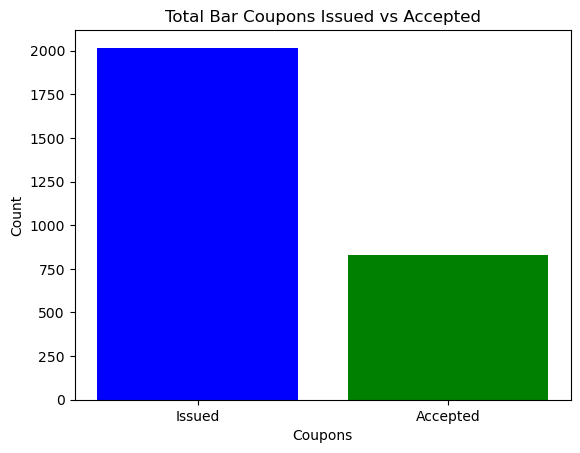

In [489]:
# Plotting
fig, ax1 = plt.subplots()

# Bar plot for the counts
ax1.bar(['Issued', 'Accepted'], [bar_results_total['Total Bar Coupons Issued'], bar_results_total['Total Bar Coupons Accepted']], color=['blue', 'green'])
ax1.set_xlabel('Coupons')
ax1.set_ylabel('Count')
ax1.set_title('Total Bar Coupons Issued vs Accepted')

# Display the plot
plt.show()

# 2.3 Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more. #
The following cell will compare the acceptance rate of bar coupons between people who went to the bar 3 or fewer times in the last month
and to those who attended more than 3 times.


In [492]:
# Calculate the total number of selected Bar values ('never', 'less1', '1~3') issued and accepted
selected_values = ['never', 'less1', '1~3']
selected_bar_coupons_df = bar_coupons_df[bar_coupons_df['Bar'].isin(selected_values)]
selected_bar_coupons_issued = selected_bar_coupons_df.shape[0]
selected_bar_coupons_accepted = selected_bar_coupons_df['Y'].sum()
selected_bar_acceptance_rate = selected_bar_coupons_accepted / selected_bar_coupons_issued
acceptance_3_or_less = selected_bar_acceptance_rate

# Display the results
bar_results_3_or_less = {
    'Selected Bar Coupons Issued (never, less1, 1~3)': selected_bar_coupons_issued,
    'Selected Bar Coupons Accepted (never, less1, 1~3)': selected_bar_coupons_accepted,
    'Proportion Accepted (Selected Bar)': selected_bar_acceptance_rate
}

print(bar_results_3_or_less)

{'Selected Bar Coupons Issued (never, less1, 1~3)': 1818, 'Selected Bar Coupons Accepted (never, less1, 1~3)': 674, 'Proportion Accepted (Selected Bar)': 0.37073707370737075}


In [494]:
# Compare the acceptance rates
acceptance_rate_comparison = {
    'Proportion Accepted (Total Bar)': total_bar_acceptance_rate,
    'Proportion Accepted (Selected Bar)': selected_bar_acceptance_rate,
    'Difference': selected_bar_acceptance_rate - total_bar_acceptance_rate
}

print(acceptance_rate_comparison)

{'Proportion Accepted (Total Bar)': 0.41001487357461575, 'Proportion Accepted (Selected Bar)': 0.37073707370737075, 'Difference': -0.039277799867245}


# 2.4 Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference? #


In [497]:

# Filter for drivers who go to a bar more than once a month and are over the age of 25
selected_drivers = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] > 25)]

# Calculate the acceptance rate for selected drivers
selected_drivers_accepted = selected_drivers['Y'].sum()
selected_drivers_total = selected_drivers.shape[0]
selected_drivers_acceptance_rate = selected_drivers_accepted / selected_drivers_total
acceptance_25_more_than_1 = selected_drivers_acceptance_rate

# Calculate the acceptance rate for all other drivers
other_drivers = data[~((data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] > 25))]
other_drivers_accepted = other_drivers['Y'].sum()
other_drivers_total = other_drivers.shape[0]
other_drivers_acceptance_rate = other_drivers_accepted / other_drivers_total

# Compare the acceptance rates
acceptance_rate_comparison = {
    'Proportion Accepted (Selected Drivers)': selected_drivers_acceptance_rate,
    'Proportion Accepted (Other Drivers)': other_drivers_acceptance_rate,
    'Difference': selected_drivers_acceptance_rate - other_drivers_acceptance_rate
}

print(acceptance_rate_comparison)

{'Proportion Accepted (Selected Drivers)': 0.6215340295282679, 'Proportion Accepted (Other Drivers)': 0.5535479963662057, 'Difference': 0.0679860331620622}


# 2.5 Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. #


In [500]:

# Filter for drivers who go to a bar more than once a month, are over the age of 25, had passengers that were not kids,
# and had occupations other than farming, fishing, or forestry
selected_drivers = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['age'] > 25) &
    (data['passenger'] != 'Kid(s)') &
    (~data['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
]

# Calculate the acceptance rate for selected drivers
selected_drivers_accepted = selected_drivers['Y'].sum()
selected_drivers_total = selected_drivers.shape[0]
selected_drivers_acceptance_rate = selected_drivers_accepted / selected_drivers_total
acceptance_passengers_more_than_1_not_fff = selected_drivers_acceptance_rate

# Calculate the acceptance rate for all other drivers
other_drivers = data[~(
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['age'] > 25) &
    (data['passenger'] != 'Kid(s)') &
    (~data['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
)]
other_drivers_accepted = other_drivers['Y'].sum()
other_drivers_total = other_drivers.shape[0]
other_drivers_acceptance_rate = other_drivers_accepted / other_drivers_total

# Compare the acceptance rates
acceptance_rate_comparison = {
    'Proportion Accepted (Selected Drivers)': selected_drivers_acceptance_rate,
    'Proportion Accepted (Other Drivers)': other_drivers_acceptance_rate,
    'Difference': selected_drivers_acceptance_rate - other_drivers_acceptance_rate
}

print(acceptance_rate_comparison)

{'Proportion Accepted (Selected Drivers)': 0.6232558139534884, 'Proportion Accepted (Other Drivers)': 0.5544338875692795, 'Difference': 0.06882192638420892}


# 2.6 Compare the acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed #
 



In [503]:

# Filter for drivers who go to a bar more than once a month, had passengers that were not kids, and were not widowed
selected_drivers = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['passenger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
]

# Calculate the acceptance rate for selected drivers
selected_drivers_accepted = selected_drivers['Y'].sum()
selected_drivers_total = selected_drivers.shape[0]
selected_drivers_acceptance_rate = selected_drivers_accepted / selected_drivers_total if selected_drivers_total > 0 else 0
acceptance_passengers_more_than_1_not_kids_widowed = selected_drivers_acceptance_rate

# Calculate the acceptance rate for all other drivers
other_drivers = data[~(
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['passenger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
)]
other_drivers_accepted = other_drivers['Y'].sum()
other_drivers_total = other_drivers.shape[0]
other_drivers_acceptance_rate = other_drivers_accepted / other_drivers_total if other_drivers_total > 0 else 0

# Compare the acceptance rates
acceptance_rate_comparison = {
    'Proportion Accepted (Selected Drivers)': selected_drivers_acceptance_rate,
    'Proportion Accepted (Other Drivers)': other_drivers_acceptance_rate,
    'Difference': selected_drivers_acceptance_rate - other_drivers_acceptance_rate
}

print(acceptance_rate_comparison)


{'Proportion Accepted (Selected Drivers)': 0.6231060606060606, 'Proportion Accepted (Other Drivers)': 0.5459501557632399, 'Difference': 0.07715590484282064}


# 2.7 Based on these observations, what do you hypothesize about drivers who accepted the bar coupons? #

The histogram shows that the acceptance rate of the bar coupon was higher among individuals over 25 who visited a bar more than once in the last month. Additionally, the acceptance rate was higher among those who had passengers that were not children and were not in farming, fishing, or forestry occupations. Furthermore, the data suggests that non-widowed individuals with passengers who were not children were more likely to accept the coupon than the average.

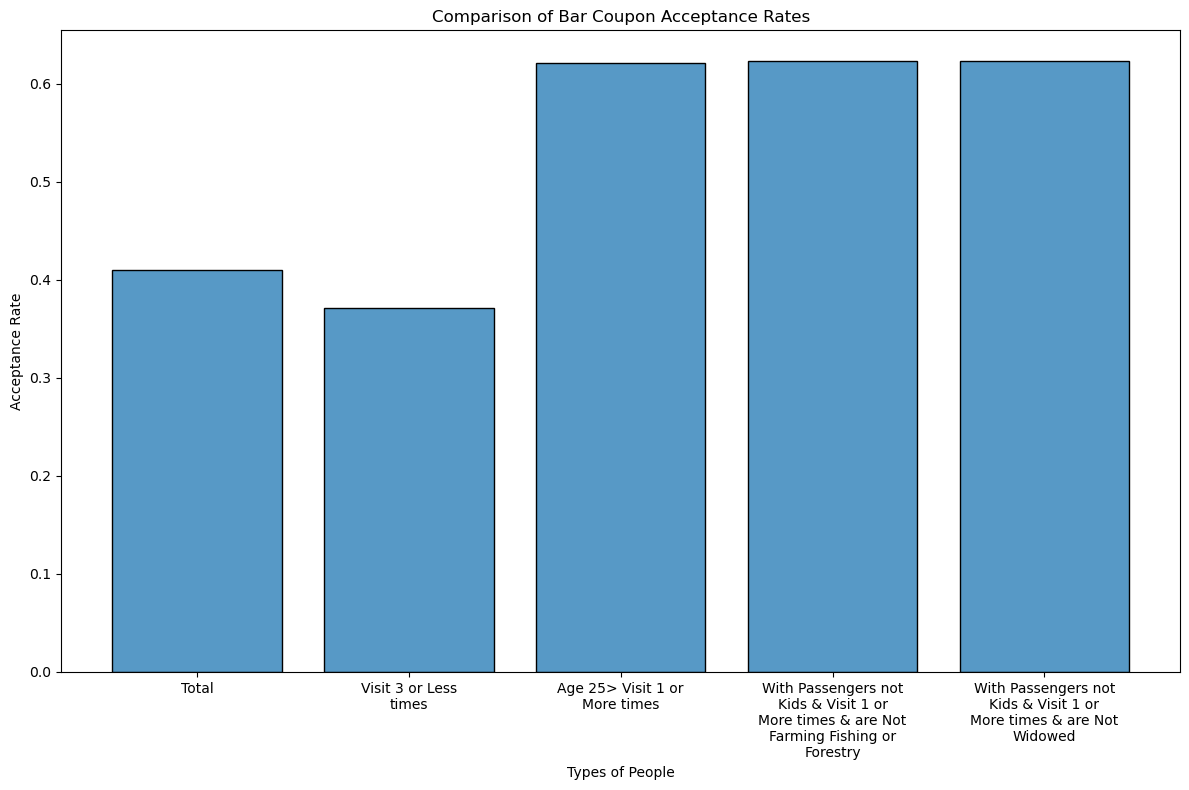

In [506]:

# Prepare data for plotting
bar_observation_data = {
    'Variable': [
        'Total',
        'Visit 3 or Less times',
        'Age 25> Visit 1 or More times',
        'With Passengers not Kids & Visit 1 or More times & are Not Farming Fishing or Forestry',
        'With Passengers not Kids & Visit 1 or More times & are Not Widowed'
    ],
    'Acceptance Rate': [
        total_bar_acceptance_rate,
        acceptance_3_or_less,
        acceptance_25_more_than_1,
        acceptance_passengers_more_than_1_not_fff,
        acceptance_passengers_more_than_1_not_kids_widowed
    ]
}

df_plot = pd.DataFrame(bar_observation_data)

# Create the bar plot (histogram-like)
plt.figure(figsize=(12, 8))
sns.histplot(data=df_plot, x='Variable', weights='Acceptance Rate', discrete=True, multiple='dodge', shrink=0.8)
plt.title('Comparison of Bar Coupon Acceptance Rates')
plt.xlabel('Types of People')
plt.ylabel('Acceptance Rate')

# Wrap the x-tick labels
labels = [textwrap.fill(label, 20) for label in df_plot['Variable']]
plt.gca().set_xticks(range(len(labels)))
plt.gca().set_xticklabels(labels, rotation=0, ha='center')

plt.tight_layout()

# Show the plot
plt.show()


# 3.1 Independent Investigation - Carry out & Take Away Coupons #

Using the bar coupon example as motivation, The following cells will explore the Carry out & Take Away coupon and try to determine the characteristics of passengers who accept the coupons. There seems to be a far higher acceptance rate of the Carry out and Take Away coupons compared to the Bar coupons.

In [509]:
# Create a new DataFrame that contains just the 'Carry out & Take away' coupons
carry_out_coupons_df = data[data['coupon'] == 'Carry out & Take away']

# Display the first few rows of the new DataFrame
carry_out_coupons_df.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,1
19,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0


# 3.2 What proportion of Carry out & Take away coupons were accepted? #
The following cell will take the total Carry out & Take away coupons issued and divide by the total Carry out & Take away coupons accepted and output the proportion accepted

In [512]:
# Calculate the total number of Bar coupons issued and accepted
total_carry_out_coupons_issued = carry_out_coupons_df.shape[0]
total_carry_out_coupons_accepted = carry_out_coupons_df['Y'].sum()
total_carry_out_acceptance_rate = total_carry_out_coupons_accepted / total_carry_out_coupons_issued

# Display the results
carry_out_results_total = {
    'Total Carry out & Take away Coupons Issued': total_carry_out_coupons_issued,
    'Total Carry out & Take away Coupons Accepted': total_carry_out_coupons_accepted,
    'Proportion Accepted (Total Carry out & Take away)': total_carry_out_acceptance_rate,
}

print(carry_out_results_total)

{'Total Carry out & Take away Coupons Issued': 2393, 'Total Carry out & Take away Coupons Accepted': 1760, 'Proportion Accepted (Total Carry out & Take away)': 0.7354784788967823}


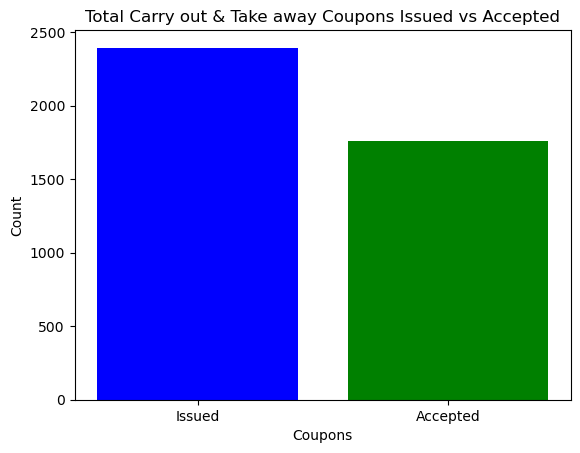

In [514]:
# Plotting
fig, ax1 = plt.subplots()

# Bar plot for the counts
ax1.bar(['Issued', 'Accepted'], [carry_out_results_total['Total Carry out & Take away Coupons Issued'], carry_out_results_total['Total Carry out & Take away Coupons Accepted']], color=['blue', 'green'])
ax1.set_xlabel('Coupons')
ax1.set_ylabel('Count')
ax1.set_title('Total Carry out & Take away Coupons Issued vs Accepted')

# Display the plot
plt.show()

# 3.3 Compare the acceptance rate between those who went to a Carry out and Take Away 3 or fewer times a month to those who went more. #
The following cell will compare the acceptance rate of Carry out and Take Away coupons between people who went to the Carry out and Take Away 3 or fewer times in the last month and to those who attended more than 3 times.

In [517]:
# Calculate the total number of selected Carry out and Take Away values ('never', 'less1', '1~3') issued and accepted
selected_values = ['never', 'less1', '1~3']
selected_carry_out_coupons_df = carry_out_coupons_df[carry_out_coupons_df['CarryAway'].isin(selected_values)]
selected_carry_out_coupons_issued = selected_carry_out_coupons_df.shape[0]
selected_carry_out_coupons_accepted = selected_carry_out_coupons_df['Y'].sum()
selected_carry_out_coupons_acceptance_rate = selected_carry_out_coupons_accepted / selected_carry_out_coupons_issued
acceptance_3_or_less = selected_carry_out_coupons_acceptance_rate

# Display the results
carry_out_results_3_or_less = {
    'Selected Carry out & Take Away Coupons Issued (never, less1, 1~3)': selected_carry_out_coupons_issued,
    'Selected Carry out & Take Away Coupons Accepted (never, less1, 1~3)': selected_carry_out_coupons_accepted,
    'Proportion Accepted (Selected Bar)': selected_carry_out_coupons_acceptance_rate
}

print(carry_out_results_3_or_less)

{'Selected Carry out & Take Away Coupons Issued (never, less1, 1~3)': 1271, 'Selected Carry out & Take Away Coupons Accepted (never, less1, 1~3)': 919, 'Proportion Accepted (Selected Bar)': 0.7230527143981117}


In [519]:
# Compare the acceptance rates
acceptance_rate_comparison = {
    'Proportion Accepted (Total Carry out & Take Away)': total_carry_out_acceptance_rate,
    'Proportion Accepted (Selected Carry out & Take Away)': selected_carry_out_coupons_acceptance_rate,
    'Difference': selected_carry_out_coupons_acceptance_rate - total_carry_out_acceptance_rate
}

print(acceptance_rate_comparison)

{'Proportion Accepted (Total Carry out & Take Away)': 0.7354784788967823, 'Proportion Accepted (Selected Carry out & Take Away)': 0.7230527143981117, 'Difference': -0.01242576449867061}


# 3.4 Compare the acceptance rate between drivers who go to Carry Out & Take Away more than once a month and are 21 years or younger to others.  Is there a difference? #

People 21 or under who have visited Carry out and Take Away 1 or more times in the last month seem to accept the coupon more that others.

In [522]:

# Filter for drivers who go to a Carry out & Take Away more than once a month and are over the age of 25
selected_drivers = data[(data['CarryAway'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] <= 21)]

# Calculate the acceptance rate for selected drivers
selected_drivers_accepted = selected_drivers['Y'].sum()
selected_drivers_total = selected_drivers.shape[0]
selected_drivers_acceptance_rate = selected_drivers_accepted / selected_drivers_total
acceptance_21_more_than_1 = selected_drivers_acceptance_rate

# Calculate the acceptance rate for all other drivers
other_drivers = data[~((data['CarryAway'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] <= 21))]
other_drivers_accepted = other_drivers['Y'].sum()
other_drivers_total = other_drivers.shape[0]
other_drivers_acceptance_rate = other_drivers_accepted / other_drivers_total

# Compare the acceptance rates
acceptance_rate_comparison = {
    'Proportion Accepted (Selected Drivers)': selected_drivers_acceptance_rate,
    'Proportion Accepted (Other Drivers)': other_drivers_acceptance_rate,
    'Difference': selected_drivers_acceptance_rate - other_drivers_acceptance_rate
}

print(acceptance_rate_comparison)

{'Proportion Accepted (Selected Drivers)': 0.6067907995618839, 'Proportion Accepted (Other Drivers)': 0.5578682755153344, 'Difference': 0.04892252404654951}


# 3.5 Use the same process to compare the acceptance rate between drivers who go to Carry out and Take Away more than once a month and do not have passengers and had occupations of Unemployed. #

In [525]:

# Filter for drivers who go to a Carry out and Take Away more than once a month, are 26 years of age or under, did not have passengers,
# and had occupations of unemployed.
selected_drivers = data[
    (data['CarryAway'].isin(['1~3','4~8','gt8'])) & 
    (data['age'] <= 21) &
    (data['passenger'] == 'Alone') &
    (data['occupation'].isin(['Unemployed']))
]

# Calculate the acceptance rate for selected drivers
selected_drivers_accepted = selected_drivers['Y'].sum()
selected_drivers_total = selected_drivers.shape[0]
selected_drivers_acceptance_rate = selected_drivers_accepted / selected_drivers_total
acceptance_alone_more_than_1_unemployed = selected_drivers_acceptance_rate

# Calculate the acceptance rate for all other drivers
other_drivers = data[~(
    (data['CarryAway'].isin(['1~3','4~8','gt8'])) & 
    (data['age'] <= 21) &
    (data['passenger'] == 'Alone') &
    (data['occupation'].isin(['Unemployed']))
)]
other_drivers_accepted = other_drivers['Y'].sum()
other_drivers_total = other_drivers.shape[0]
other_drivers_acceptance_rate = other_drivers_accepted / other_drivers_total

# Compare the acceptance rates
acceptance_rate_comparison = {
    'Proportion Accepted (Selected Drivers)': selected_drivers_acceptance_rate,
    'Proportion Accepted (Other Drivers)': other_drivers_acceptance_rate,
    'Difference': selected_drivers_acceptance_rate - other_drivers_acceptance_rate
}

print(acceptance_rate_comparison)

{'Proportion Accepted (Selected Drivers)': 0.5818181818181818, 'Proportion Accepted (Other Drivers)': 0.5681360303005882, 'Difference': 0.013682151517593555}


# 3.6 Compare the acceptance rates between those drivers who go to Carry out and Take Away more than once a month, are alone, and are single #

In [528]:

# Filter for drivers who go to a bar more than once a month, had passengers that were not kids, and were not widowed
selected_drivers = data[
    (data['CarryAway'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['passenger'] == 'Alone') &
    (data['maritalStatus'] == 'Single')
]

# Calculate the acceptance rate for selected drivers
selected_drivers_accepted = selected_drivers['Y'].sum()
selected_drivers_total = selected_drivers.shape[0]
selected_drivers_acceptance_rate = selected_drivers_accepted / selected_drivers_total if selected_drivers_total > 0 else 0
acceptance_alone_more_than_1_single = selected_drivers_acceptance_rate

# Calculate the acceptance rate for all other drivers
other_drivers = data[~(
    (data['CarryAway'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['passenger'] == 'Alone') &
    (data['maritalStatus'] == 'Single')
)]
other_drivers_accepted = other_drivers['Y'].sum()
other_drivers_total = other_drivers.shape[0]
other_drivers_acceptance_rate = other_drivers_accepted / other_drivers_total if other_drivers_total > 0 else 0

# Compare the acceptance rates
acceptance_rate_comparison = {
    'Proportion Accepted (Selected Drivers)': selected_drivers_acceptance_rate,
    'Proportion Accepted (Other Drivers)': other_drivers_acceptance_rate,
    'Difference': selected_drivers_acceptance_rate - other_drivers_acceptance_rate
}

print(acceptance_rate_comparison)

{'Proportion Accepted (Selected Drivers)': 0.5821782178217821, 'Proportion Accepted (Other Drivers)': 0.5650162417560783, 'Difference': 0.0171619760657038}


# 3.7 Based on these observations, what do you hypothesize about drivers who accepted the Carry Out and Take Away coupons? #

The histogram shows that the acceptance rate of the carry-out and Take-Away coupons was higher among individuals 21 years and younger who visited a carry-out and Take-Away more than once in the last month. Additionally, the acceptance rate was higher among those who were alone and unemployed. Furthermore, the data suggests that Single individuals are more likely to accept the coupon than the average.

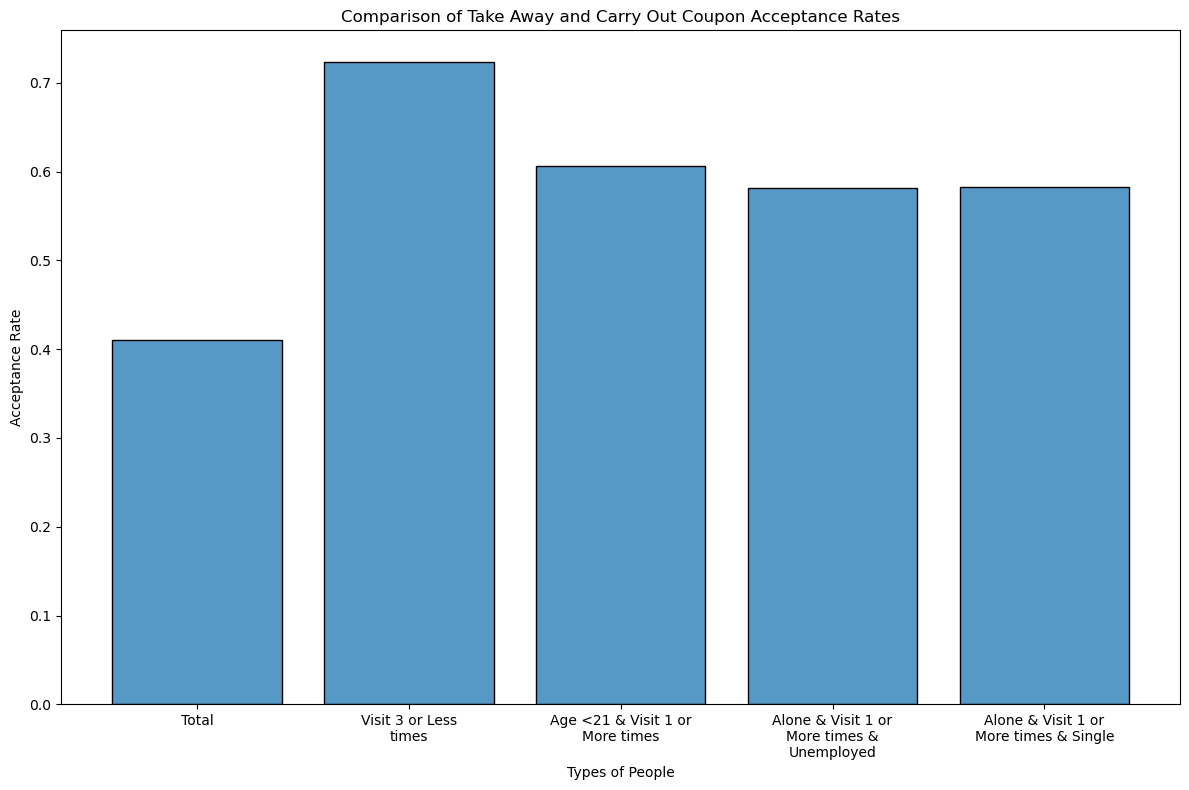

In [531]:

# Prepare data for plotting
bar_observation_data = {
    'Variable': [
        'Total',
        'Visit 3 or Less times',
        'Age <21 & Visit 1 or More times',
        'Alone & Visit 1 or More times & Unemployed',
        'Alone & Visit 1 or More times & Single'
    ],
    'Acceptance Rate': [
        total_bar_acceptance_rate,
        acceptance_3_or_less,
        acceptance_21_more_than_1,
        acceptance_alone_more_than_1_unemployed,
        acceptance_alone_more_than_1_single
    ]
}

df_plot = pd.DataFrame(bar_observation_data)

# Create the bar plot (histogram-like)
plt.figure(figsize=(12, 8))
sns.histplot(data=df_plot, x='Variable', weights='Acceptance Rate', discrete=True, multiple='dodge', shrink=0.8)
plt.title('Comparison of Take Away and Carry Out Coupon Acceptance Rates')
plt.xlabel('Types of People')
plt.ylabel('Acceptance Rate')

# Wrap the x-tick labels
labels = [textwrap.fill(label, 20) for label in df_plot['Variable']]
plt.gca().set_xticks(range(len(labels)))
plt.gca().set_xticklabels(labels, rotation=0, ha='center')

plt.tight_layout()

# Show the plot
plt.show()